In [1]:
import os
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
from Ctorch import *
from functions import *
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.signal import fftconvolve
from skimage import io
from scipy.fftpack import idct
#from model import *
from tqdm import tnrange,tqdm_notebook
import PIL
from dataloaders import *
from visualise import *
from time import time
torch.cuda.set_device(0)
import shutil
from tensorboardX import SummaryWriter
from torch.utils.data import DataLoader
from training import *
from WienerCNN import *
%matplotlib inline

# Standard data type: batches of shape NxCxHxWx2

In [2]:
net = FourierDeconvolution(stage=1,grayscale=False);
net.cuda();
#net.load_state_dict(torch.load('trained/init_train.pt'));

/home/koshelev/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [3]:
train(net,100,'dataset/',6,gpu=2,dictname='FNet_color_stage1_lr=0.01');

Process Process-3:
Process Process-6:
Process Process-1:
Process Process-2:
Process Process-5:
Process Process-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/koshelev/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batc

KeyboardInterrupt: 

In [3]:
net = WienerDeconvolution(n_filters=16,filter_size=3,grayscale=False);
net.cuda();

In [ ]:
train_wiener(net,100,'dataset/',48,gpu=2,dictname='WNet_color_16x3x3_noise1_lr=0.01');

In [5]:
net.lam

Parameter containing:
tensor(-1.8029, device='cuda:0', requires_grad=True)

In [4]:
net.filters.shape

torch.Size([8, 3, 3, 3])

In [5]:
torch.save(net.state_dict(),'trained/init_train.pt');

In [23]:
import torch
from io import BytesIO
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torchvision.transforms import ToTensor
from PIL.Image import open as imopen

def colorbar(mappable):
    ax = mappable.axes;
    fig = ax.figure;
    divider = make_axes_locatable(ax);
    cax = divider.append_axes("right", size="5%", pad=0.05);
    return fig.colorbar(mappable, cax=cax);

def plot2writer(fig):
    """Export pyplot figure to tensor image for writing in TensorBoardX."""
    buf = BytesIO();
    fig.savefig(buf, format='png');
    buf.seek(0);
    image = imopen(buf);
    image = ToTensor()(image);
    plt.close('all');
    return image;

def visualise_weights(layer_weights,nv=6,nh=4,w=6.75,h=10):
    fig, axes = plt.subplots(nv, nh, figsize=(w, h));
    for i in range(nv):
        for j in range(nh):
            im = axes[i][j].imshow(layer_weights[i*nh+j,0,:,:]);
            axes[i][j].axis('off');
            colorbar(im);
    return plot2writer(fig);

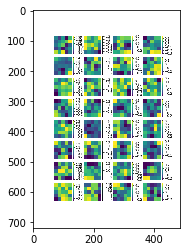

In [42]:
plt.imshow(visualise_weights(net.cnn.conv0.weight.detach().cpu(),nv=8,nh=4,w=6.75,h=10).permute(1,2,0))

In [12]:
valset = Dataset_color('dataset/',img_size=(500,500),train=False);
valloader = DataLoader(valset, batch_size=5, shuffle=False, num_workers=6);
valloss = [];
for i_batch, (x,y,k,l) in enumerate((tqdm_notebook(valloader))):
    # obtaining loss
    valloss.append(compute_loss_cuda(net,x,y,k,l).detach().cpu());
valloss = -np.mean(valloss);

Process Process-20:
Process Process-21:
Process Process-19:
Process Process-24:
Process Process-22:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/hom

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/koshelev/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/koshelev/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/koshelev/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/koshelev/vdeblur/dataloaders.py", line 171, in __getitem__
    blurred = F.conv2d(gt.unsqueeze(0),flip_kernels(kern.unsqueeze(0).unsqueeze(0)).expand(3,1,k_shape[0],k_shape[1]),groups=3).squeeze(0);
KeyboardInterrupt


In [15]:
net.cnn.conv0.weight.grad.shape

torch.Size([32, 3, 5, 5])